<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

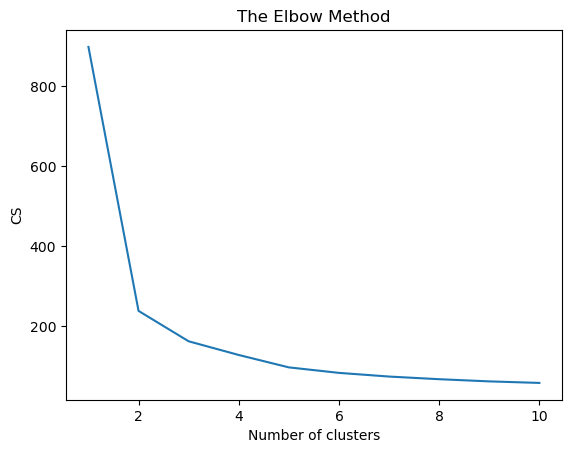

In [12]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
#Import Data
data = 'C:\MCS\Clustering\Live.csv'
df = pd.read_csv(data)
# shape of data
df.shape
#Head of data
df.head()
df.info()
df.isnull().sum()
#Drop Columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

df['status_type'].unique()
len(df['status_type'].unique())
#We can see that there are 4 categories of labels in the status_type variable.
df['status_id'].unique()
len(df['status_id'].unique())
df['status_published'].unique()
len(df['status_published'].unique())
# Again, we can see that there are 6913 unique labels in the status_published variable.
# Drop status_id and status_published variable from the dataset
df.drop(['status_id', 'status_published'], axis=1, inplace=True)
#Declare feature vector and target variable
X = df
y = df['status_type']
# Convert categorical variable into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)
#View the summary of X
X.info()
X.head()

#Feature Scaling
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

#K-Means model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)
#K-Means model parameters study
kmeans.cluster_centers_
#Inertia should be near  0
kmeans.inertia_
#The lesser the model inertia, the better the model fit.
#We can see that the model has very high inertia. So, this is not a good model fit to the data

#Check quality of weak classification by the model
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

#Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
